برای انجام سوال ۴ از داک رسمی 

OpenCV

و آموزش

Camera Calibration 

به عنوان منبع کمک گرفته شده است

source: https://docs.opencv.org/4.x/dc/dbb/tutorial_py_calibration.html

In [1]:
from google.colab import files
uploaded = files.upload()

Saving img1.png to img1.png
Saving img2.png to img2.png
Saving img3.png to img3.png
Saving img4.png to img4.png
Saving img5.png to img5.png


In [2]:
import numpy as np
import cv2 as cv
import glob
from google.colab.patches import cv2_imshow

## 1.

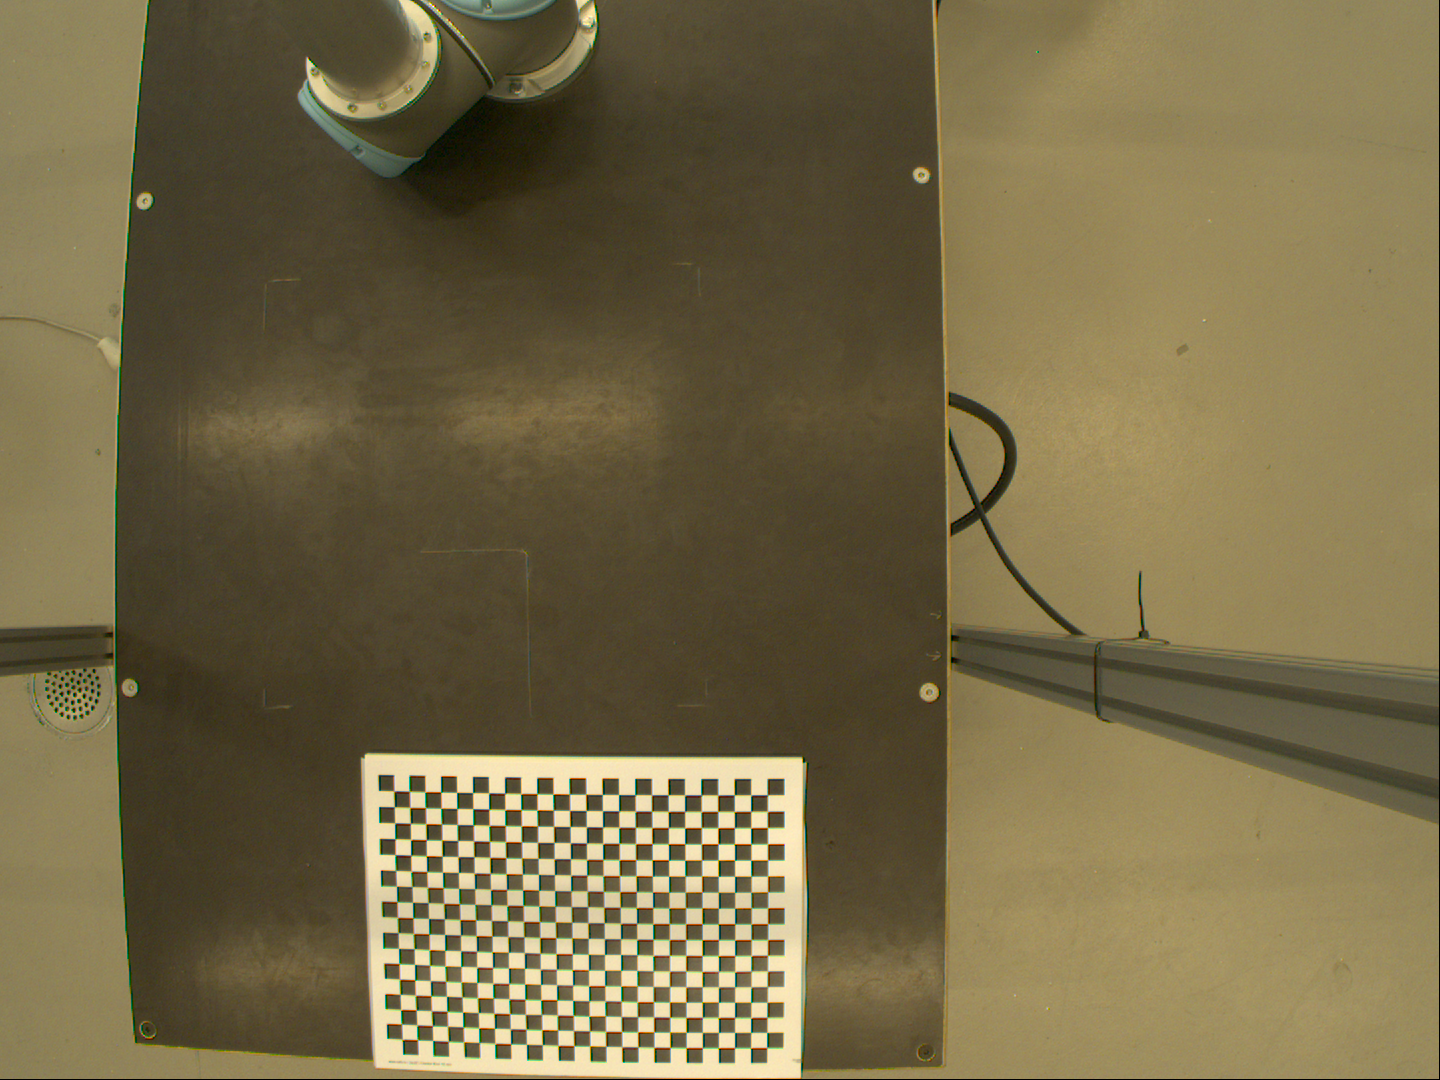

In [3]:
img1 = cv.imread('img1.png')
img1_g = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
cv2_imshow(img1)

به دلیل اینکه در عمل، هیچ لنز ساخته شده ای ایده آل نیست، تصاویر ثبت شده توسط دوربین ها دارای اعوجاج هستند
این اعوجاج به دو نوع اصلی، برحسب دلایل تشکیل آن ها، تقسیم می شوند



*    اعوجاج شعاعی که حاصل از شکل لنز است
*   اعوجاج مماسی که حاصل از فرآیند سوار کردن دوربین است



## 2.

In [4]:
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

realp = np.zeros((17*24,3), np.float32)
realp[:,:2] = np.mgrid[0:24,0:17].T.reshape(-1,2)

realpoints = [] 
imgpoints = [] 

ret, corners = cv.findChessboardCorners(img1_g, (24,17), None)

## 3.

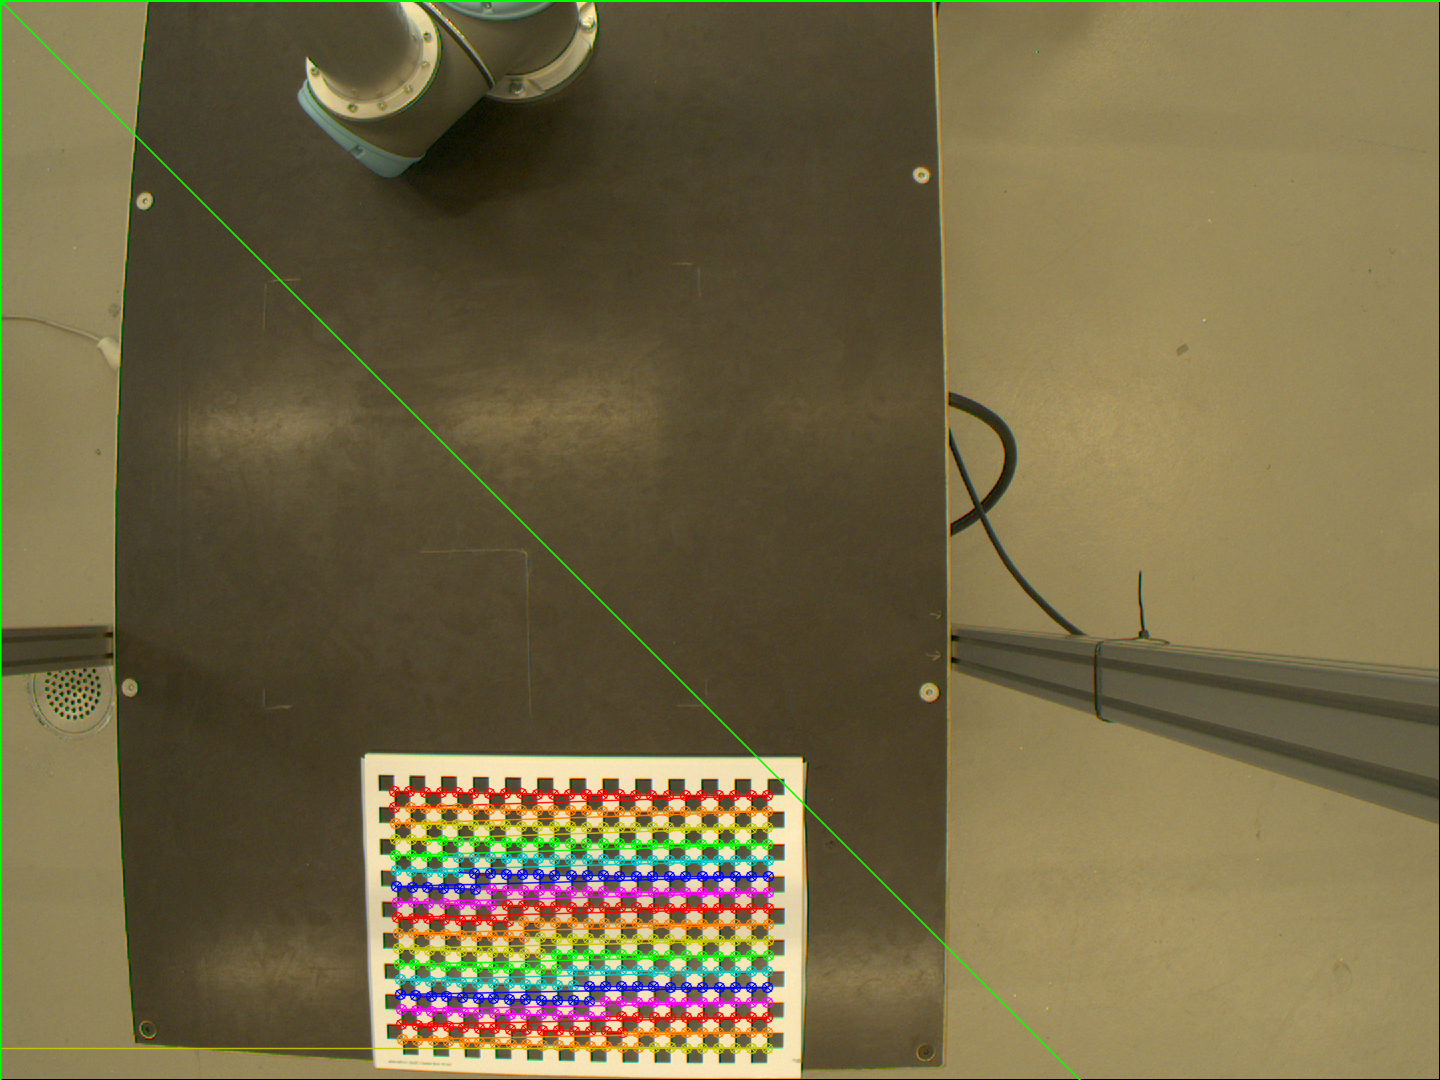

In [5]:
if ret == True:
    realpoints.append(realp)
    corners2 = cv.cornerSubPix(img1_g,corners, (11,11), (-1,-1), criteria)
    imgpoints.append(corners2)
    cv.drawChessboardCorners(img1, (25,18), corners2, ret)
    cv2_imshow(img1)

## 4.

In [6]:
ret, matrix, coefficients, rotation, translation = cv.calibrateCamera(realpoints, imgpoints, img1_g.shape[::-1], None, None)

## 5.

In [7]:
print('k1: '+str(coefficients[0][0]))
print('k2: '+str(coefficients[0][1]))
print('p1: '+str(coefficients[0][2]))
print('p1: '+str(coefficients[0][3]))
print('k3: '+str(coefficients[0][4]))

k1: -0.20625468217645052
k2: 0.1989532000635177
p1: -0.0008226067014379251
p1: -0.01649139004542897
k3: -0.18016533305335386


## 6.

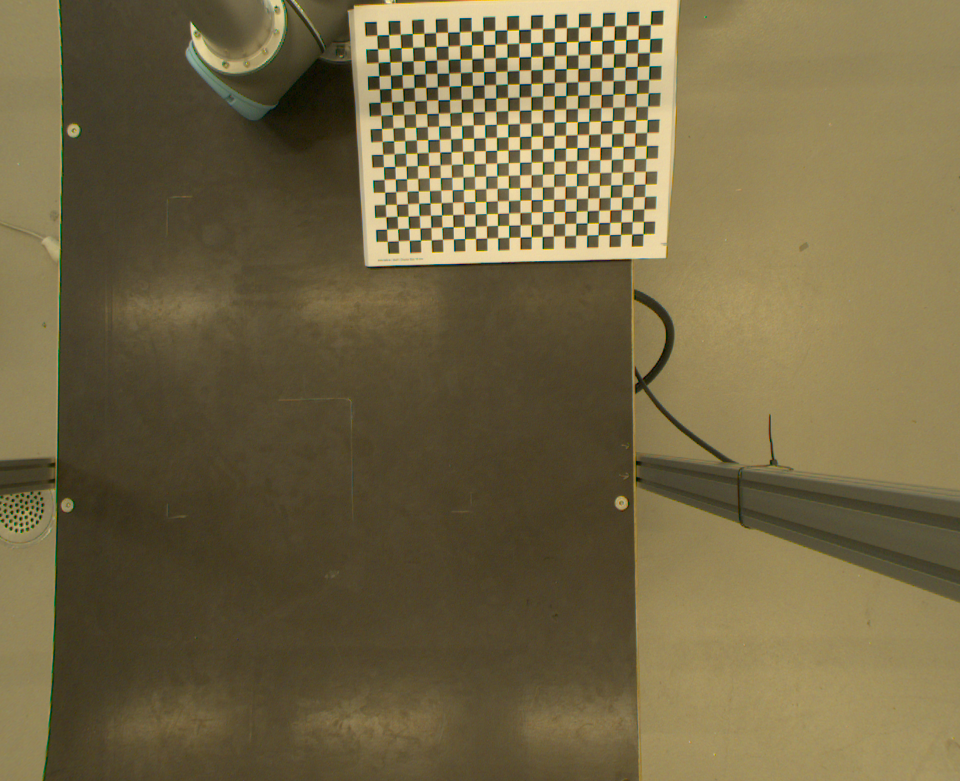

In [9]:
img5 = cv.imread('img5.png')
h,  w = img5.shape[:2]
new_camera, crop = cv.getOptimalNewCameraMatrix(matrix, coefficients, (w,h), 1, (w,h))
dst = cv.undistort(img5, matrix, coefficients, None, new_camera)

x, y, w, h = crop
img5 = dst[y:y+h, x:x+w]
cv2_imshow(img5)

## 7.

k1: -0.3118552189954779
k2: 0.24935641123191235
p1: -0.0018709405932336807
p1: 0.009470340198474685
k3: -0.17159194150093998


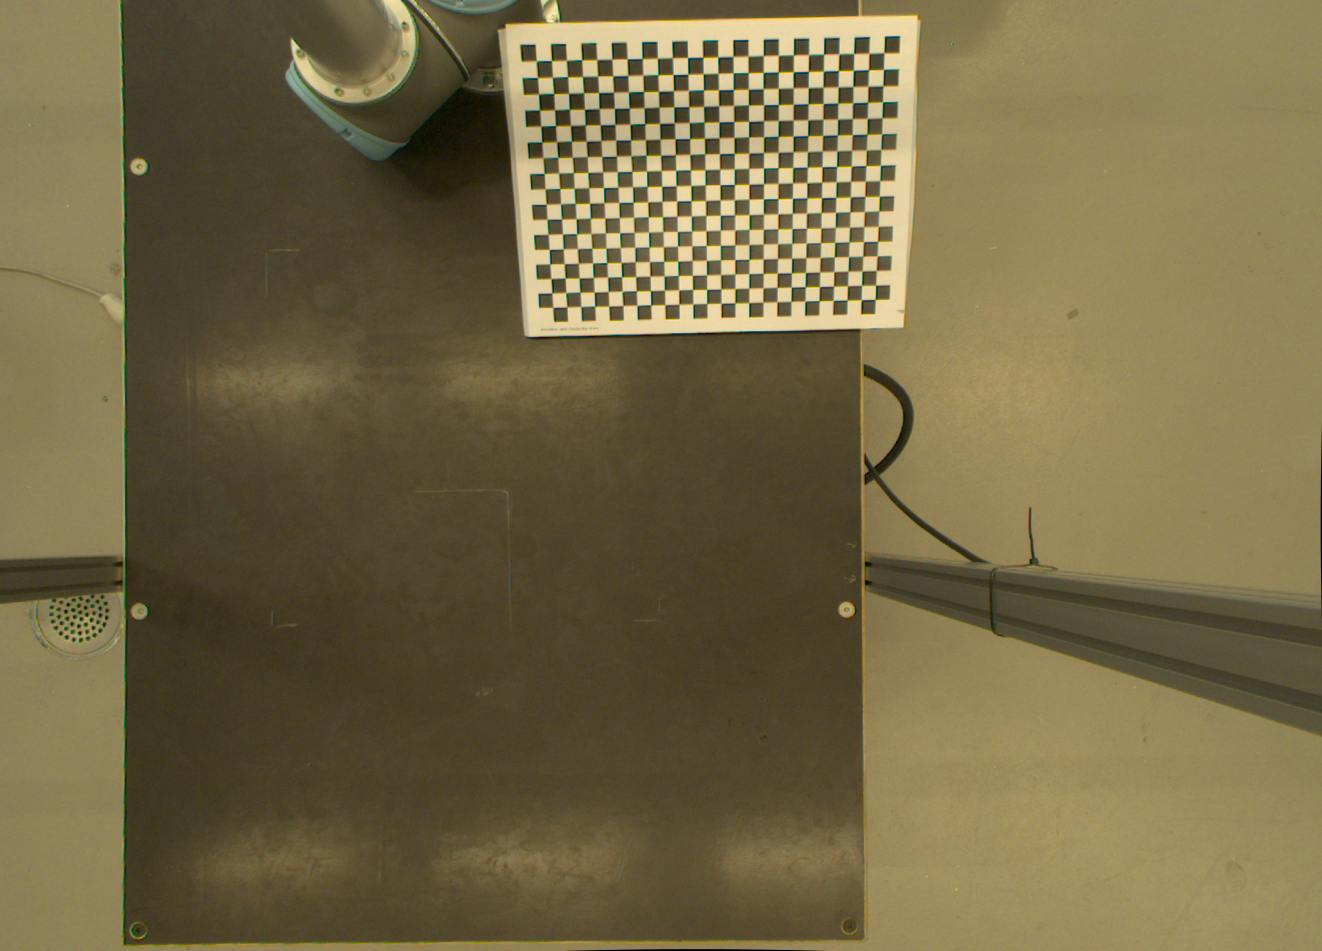

In [10]:
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
realp = np.zeros((17*24,3), np.float32)
realp[:,:2] = np.mgrid[0:24,0:17].T.reshape(-1,2)

realpoints = [] 
imgpoints = [] 
images = ['img1.png','img2.png','img3.png','img4.png']

for fname in images:
    img = cv.imread(fname)
    img_g = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  
    ret, corners = cv.findChessboardCorners(img_g, (24,17), None)
    
    if ret == True:
        realpoints.append(realp)
        corners2 = cv.cornerSubPix(img_g,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)
     
ret, matrix, coefficients, rotation, translation = cv.calibrateCamera(realpoints, imgpoints, img_g.shape[::-1], None, None)
print('k1: '+str(coefficients[0][0]))
print('k2: '+str(coefficients[0][1]))
print('p1: '+str(coefficients[0][2]))
print('p1: '+str(coefficients[0][3]))
print('k3: '+str(coefficients[0][4]))

img5 = cv.imread('img5.png')
h,  w = img5.shape[:2]
new_camera, crop = cv.getOptimalNewCameraMatrix(matrix, coefficients, (w,h), 1, (w,h))
dst = cv.undistort(img5, matrix, coefficients, None, new_camera)

x, y, w, h = crop
img5 = dst[y:y+h, x:x+w]
cv2_imshow(img5)

در این مرحله اعوجاج تصویر با دقت بیشتری برطرف شده است. به این دلیل که تابع کالیبراسیون معادلات مربوط به ۴ عکس را در خود داشته و ماتریس خروجی از حل کردن معادلات تصویر بیشتری حاصل شده است
 در نتیجه پارامترهای حاصل از این تابع دقیق تر خواهند بود